# Pseudorandom Number Generators using Image as a Seed

## Initialization

In [1]:
# Import libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

(700, 1080)


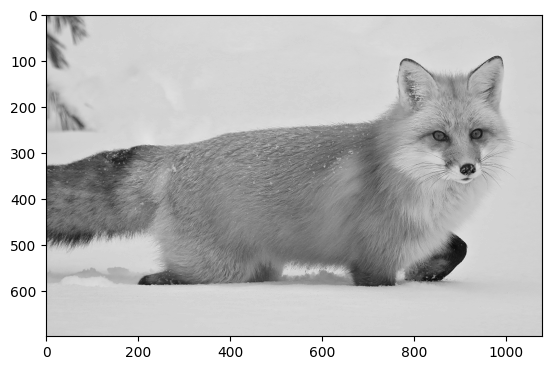

In [2]:
# Read image
img = cv.imread('majestic.png')

# Convert image to grayscale
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

print(img.shape)
plt.imshow(img, cmap=plt.cm.gray)

## Pseudorandom Number Generator (PRNG)

#### Norm of a Matrix (Rate of Change)

In [3]:
# Get norm of image at point (x,y) with kernel
def get_norm(x,y, kernel_size, img_padded):
    x+=1
    y+=1
    # Get kernel
    kernel = img_padded[x-1:x+kernel_size-1, y-1:y+kernel_size-1]
    # Get norm
    det = np.linalg.norm(kernel)
    # print(det)
    return det

#### Proposed Modified Pseudoranom Number Generator (PRNG) Algorithm

In [4]:
# Function for PRNG using image as seed
def prng(seed, latest_decimal_number, x, y, kernel_size, img_padded):
    # Set rate as a norm of specified index
    rate = get_norm(x,y,kernel_size, img_padded)
    # Set random number as a product of rate, square of seed, and square of latest random number
    random_number = rate * seed[x,y] * latest_decimal_number
    # print(random_number ,rate, seed[x,y], latest_decimal_number)
    return random_number

In [5]:
# Generate random numbers 
def generate_random_numbers(seed, kernel_size, n, alpha=0.5):
    # print(seed.shape)

    # Pad image with zeros
    img_padded = cv.copyMakeBorder(img, 1, 1, 1, 1, cv.BORDER_CONSTANT, value=[0, 0, 0])

    # Initialize random number list
    random_numbers = []
    # Set latest decimal number as alpha, can't be 0, to avoid multiple by 0 at start of iteration
    if alpha == 0:
        alpha = 0.5
    latest_decimal_number = alpha

    # Iterate through image
    for k in range(n):
        for x in range(seed.shape[0]):
            for y in range(seed.shape[1]):
                # Get random number
                random_number = prng(seed, latest_decimal_number, x, y, kernel_size, img_padded)
                # Append random number to list
                random_numbers.append(round(random_number)%2)
                # Set latest random number as current random number
                latest_decimal_number = random_number - int(random_number)
                # print(random_number, latest_decimal_number)

                # Avoid multiple by 0
                if latest_decimal_number == 0:
                    latest_decimal_number = alpha
                # Check if list is full
                if len(random_numbers) == n:
                    # Return list
                    return random_numbers

### Implementation of Proposed PRNG

In [6]:
# Function to visualize from the ratio of 1s and 0s in the list
def visualize(arr, n):
        plt.figure(figsize=(8, 6))
        # Get number of 1s
        ones = arr.count(1)/len(arr)
        # Get number of 0s
        zeros = arr.count(0)/len(arr)
        # Pie chart, where the slices will be ordered and plotted counter-clockwise:
        labels = 'Ones', 'Zeros'
        sizes = [ones, zeros]
        explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

        fig1, ax1 = plt.subplots()
        ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                shadow=True, startangle=90)

        # Equal aspect ratio ensures that pie is drawn as a circle.
        ax1.axis('equal')
        plt.title('Ratio of 1s and 0s on ' + str(n) + ' random numbers')
        plt.show()

In [7]:
# Frequency of 1s and 0s
def frequency(arr):
    ones = arr.count(1)
    zeros = arr.count(0)
    print('Number of 1s: ', ones)
    print('Number of 0s: ', zeros)

    ratio = ones/zeros
    print('Ratio of 1s and 0s: ', ratio)

<Figure size 800x600 with 0 Axes>

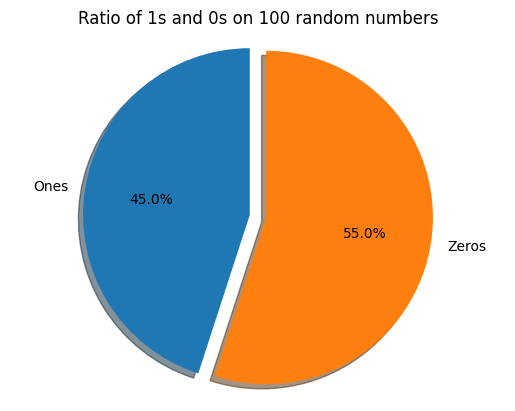

Number of 1s:  45
Number of 0s:  55
Ratio of 1s and 0s:  0.8181818181818182


<Figure size 800x600 with 0 Axes>

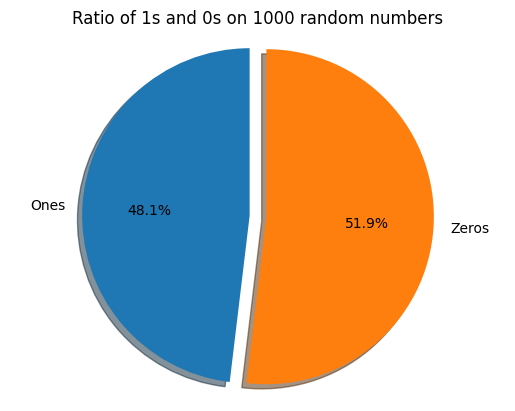

Number of 1s:  481
Number of 0s:  519
Ratio of 1s and 0s:  0.9267822736030829


<Figure size 800x600 with 0 Axes>

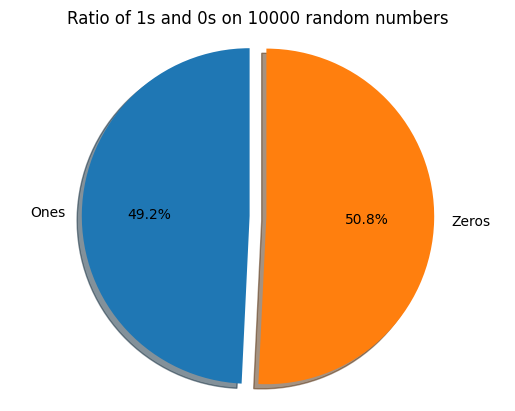

Number of 1s:  4924
Number of 0s:  5076
Ratio of 1s and 0s:  0.9700551615445232


<Figure size 800x600 with 0 Axes>

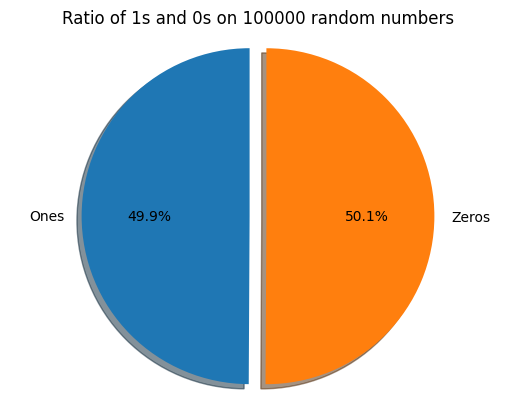

Number of 1s:  49918
Number of 0s:  50082
Ratio of 1s and 0s:  0.9967253703925562


<Figure size 800x600 with 0 Axes>

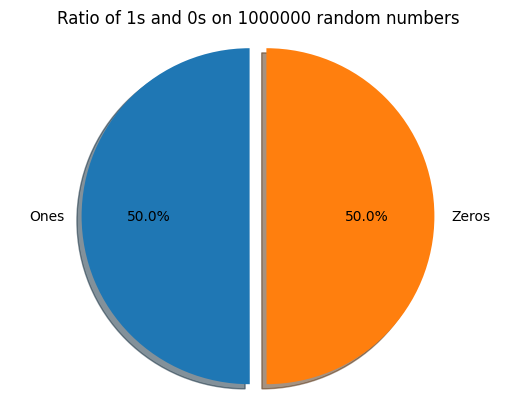

Number of 1s:  500163
Number of 0s:  499837
Ratio of 1s and 0s:  1.0006522126213147


In [8]:
# Testing on various iterations
iterations = [100, 1000, 10000, 100000, 1000000]
for i in iterations:
    arr = generate_random_numbers(img, 3, i)
    visualize(arr, i)
    frequency(arr)

## Testing the PRNG

In [9]:
# Read images from folder and save to list
import os

# Get list of images in folder
images = os.listdir('images')
# Initialize list of images
images_list = []

# Iterate through images
for image in images:
    # Read image
    img = cv.imread('images/'+ image)
    # Convert image to grayscale
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Add image to list
    images_list.append(img)

In [10]:
# Test PRNG with images
test_results = []
for img in images_list:
    arr = generate_random_numbers(img, 3, 1000000)
    test_results.append(arr)
    # visualize(arr)

In [11]:
# Visualize results using pie chart for each image in the same figure
def visualize_results(test_results):
    # Initialize figure
    fig, axs = plt.subplots(5, 2)
    fig.set_figheight(12)
    fig.set_figwidth(10)
    # Iterate through results
    for i in range(len(test_results)):
        # Get number of 1s
        ones = test_results[i].count(1)/len(test_results[i])
        # Get number of 0s
        zeros = test_results[i].count(0)/len(test_results[i])
        # Pie chart, where the slices will be ordered and plotted counter-clockwise:
        labels = 'Ones', 'Zeros'
        sizes = [ones, zeros]
        explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

        # Plot pie chart
        axs[i//2, i%2].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                shadow=True, startangle=90)
        # Equal aspect ratio ensures that pie is drawn as a circle.
        axs[i//2, i%2].axis('equal')
        axs[i//2, i%2].set_title(images[i])
    plt.show()

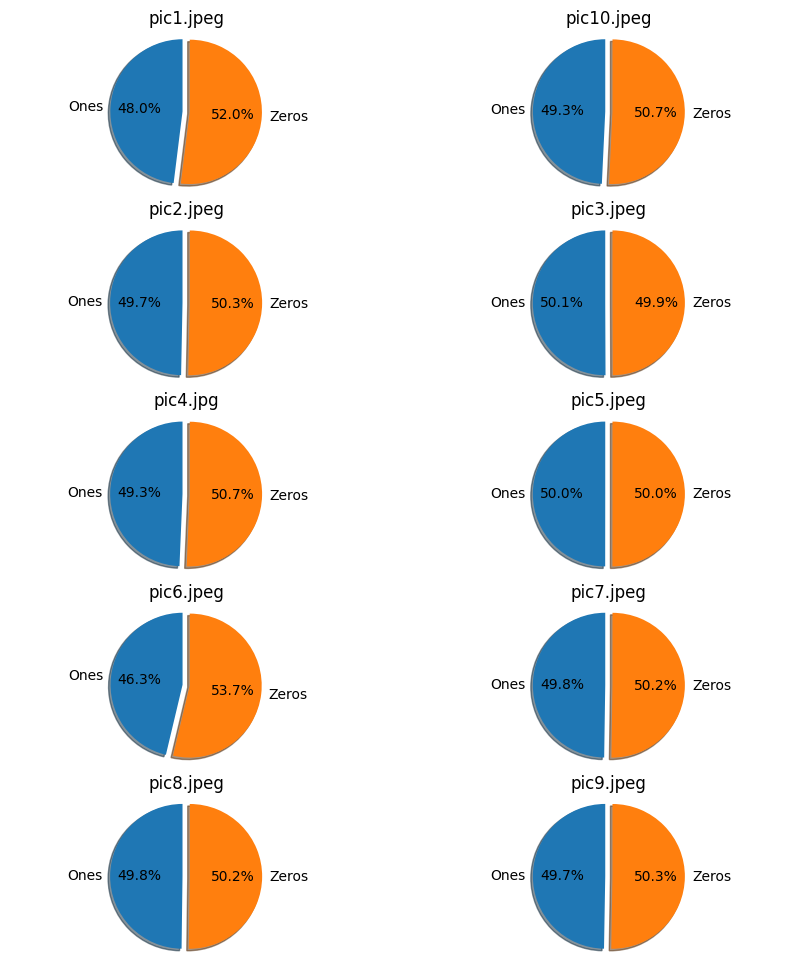

In [12]:
visualize_results(test_results)